## MODEL Building (Under sampling dataset)

In [1]:
#importing modules
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#importing under sampling dataset
ecommerce_df = pd.read_csv(Path('Resources/Cleaned_data/under_sampling_data.csv'))

In [3]:
#looking the few rows
ecommerce_df.head()

,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,44.541667,40.666667,53.708333,0.000000,0.018182,0.000000,0.0,Dec,2,2,2,1,Returning_Visitor,False,False
1,0.000000,0.000000,53.166667,0.000000,0.050000,0.000000,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
2,0.000000,0.000000,220.678571,0.014286,0.033333,0.000000,0.0,Dec,1,1,3,1,Returning_Visitor,False,False
3,5.666667,0.000000,24.086352,0.009524,0.040317,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
4,22.260000,0.000000,30.232723,0.000000,0.008337,17.634346,0.0,Nov,2,2,9,2,Returning_Visitor,False,False


In [4]:
ecommerce_df["Revenue"].value_counts()

False    1908
True     1908
Name: Revenue, dtype: int64

In [5]:
#shape of dataframe
ecommerce_df.shape

(3816, 15)

In [6]:
# create feature matrix (X)
#selecting all columns except 'Revenue'
X=ecommerce_df.drop('Revenue', axis=1) 

# create response vector (y)
##selecting 'Revenue' column
y=ecommerce_df['Revenue'].values 

In [7]:
# Seperating categorical columns
cat_columns=['Month','OperatingSystems', 'Browser', 'Region',
             'TrafficType','VisitorType','Weekend']

In [8]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X, columns = cat_columns)
print(X_dummies.columns)
X_dummies.head()

Index(['Administrative_Avg', 'Informational_Avg', 'ProductRelated_Avg',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_Other', 'Browser_1', 'Browser_10', 'Browser_2',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_Other', 'Region_1',
       'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7',
       'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_13', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_8',
       'TrafficType_Other', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True'],
      dtype='object')


,Administrative_Avg,Informational_Avg,ProductRelated_Avg,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,...,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_8,TrafficType_Other,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,44.541667,40.666667,53.708333,0.000000,0.018182,0.000000,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0.000000,0.000000,53.166667,0.000000,0.050000,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.000000,0.000000,220.678571,0.014286,0.033333,0.000000,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,5.666667,0.000000,24.086352,0.009524,0.040317,0.000000,0.0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,22.260000,0.000000,30.232723,0.000000,0.008337,17.634346,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [9]:
#Total columns before and after one-hot encoding
print(f'Total column before one hot encoding: {X.shape[1]}, Total columns after one hot encoding: {X_dummies.shape[1]}')

Total column before one hot encoding: 14, Total columns after one hot encoding: 53


In [10]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=42)

In [12]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.25984905, -0.26915436,  1.38554087, ...,  0.48224282,
         0.55717103, -0.55717103],
       [-0.46387811,  0.31627294, -0.34015459, ...,  0.48224282,
         0.55717103, -0.55717103],
       [-0.46387811, -0.26915436, -1.05942478, ...,  0.48224282,
         0.55717103, -0.55717103],
       ...,
       [-0.46387811, -0.26915436,  0.22058076, ...,  0.48224282,
         0.55717103, -0.55717103],
       [-0.46387811, -0.26915436,  0.07184404, ..., -2.07364414,
         0.55717103, -0.55717103],
       [-0.02820316,  0.58319748, -0.37365499, ...,  0.48224282,
         0.55717103, -0.55717103]])

In [13]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.21621873, -0.26915436, -0.57945596, ..., -2.07364414,
         0.55717103, -0.55717103],
       [-0.13777792, -0.26915436, -0.40758609, ...,  0.48224282,
         0.55717103, -0.55717103],
       [ 0.42957387,  0.35502945, -0.47588607, ...,  0.48224282,
         0.55717103, -0.55717103],
       ...,
       [ 0.45273756, -0.26915436,  0.74889613, ...,  0.48224282,
        -1.79478103,  1.79478103],
       [ 2.42106239, -0.26915436,  0.1023663 , ...,  0.48224282,
        -1.79478103,  1.79478103],
       [ 0.16747686,  0.07506465, -0.45772341, ...,  0.48224282,
         0.55717103, -0.55717103]])

In [14]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled, y_train=y_train):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("******************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("************Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("******Confusion Matrix using cross_val_predict****")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("***********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_train_predc=cross_val_predict(model,X_train_scaled, y_train,cv=3,
                                    method="predict_proba")
    y_proba = y_train_predc[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("**************Area under the curve******************")
    print(roc_auc)
    
    
    
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("********************Train Score******************")
    print(train_score)
    print()

    print("*********************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("**************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("**********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("**************Area under the curve******************")
    print(roc_auc)


## Model 1: Stochastic Gradent Descent Classifier

In [15]:
# Creating a sgd classifier model on the scaled data
sgd=SGDClassifier(random_state=42, loss='log', penalty='l2')

# Fit the model to the data
sgd.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

******************Train Score******************
0.7896575821104123

************Using K=3 cross validation**********
[0.78197065 0.77463312 0.77568134]

******Confusion Matrix using cross_val_predict****
[[1117  303]
 [ 334 1108]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1420
           1       0.79      0.77      0.78      1442

    accuracy                           0.78      2862
   macro avg       0.78      0.78      0.78      2862
weighted avg       0.78      0.78      0.78      2862


ROC Curve


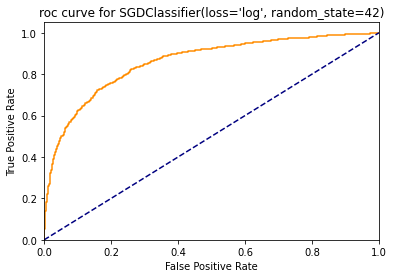


**************Area under the curve******************
0.8589332109159813


In [16]:
#score for logistic regression using only training data
train_score(sgd)

### Tuning hyperparamaters using Grid Search CV for Stochastic Gradent Descent Classifier

In [17]:
#### Using GridSearchCV
param_grid_sgd = {
              'penalty': ['l1','l2', 'elasticnet'],
             'loss':['log', 'modified_huber'],
                'max_iter':[10, 50, 100,500,1000]}
grid_sgd = GridSearchCV(sgd, param_grid_sgd, cv=5, verbose=1, n_jobs=-1)

In [18]:
grid_sgd.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=SGDClassifier(loss='log', random_state=42),
             n_jobs=-1,
             param_grid={'loss': ['log', 'modified_huber'],
                         'max_iter': [10, 50, 100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=1)

In [19]:
# best parameters for this dataset
print(grid_sgd.best_params_)

{'loss': 'log', 'max_iter': 50, 'penalty': 'l1'}


In [20]:
# best score
print(grid_sgd.best_score_)

0.7983975884499445


In [21]:
#best estimator
sgd_b=grid_sgd.best_estimator_
sgd_b

SGDClassifier(loss='log', max_iter=50, penalty='l1', random_state=42)

******************Train Score******************
0.7973445143256463

************Using K=3 cross validation**********
[0.77987421 0.79769392 0.778826  ]

******Confusion Matrix using cross_val_predict****
[[1206  214]
 [ 400 1042]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.75      0.85      0.80      1420
           1       0.83      0.72      0.77      1442

    accuracy                           0.79      2862
   macro avg       0.79      0.79      0.78      2862
weighted avg       0.79      0.79      0.78      2862


ROC Curve


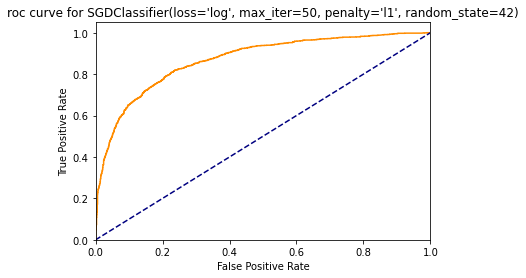


**************Area under the curve******************
0.8685650309624737


In [22]:
#score for Stochastic Gradent Descent Classifier using training data
train_score(sgd_b)

## Model 2: Logistic Regression

In [23]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

******************Train Score******************
0.8200559049615653

************Using K=3 cross validation**********
[0.79769392 0.80712788 0.79874214]

******Confusion Matrix using cross_val_predict****
[[1177  243]
 [ 326 1116]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1420
           1       0.82      0.77      0.80      1442

    accuracy                           0.80      2862
   macro avg       0.80      0.80      0.80      2862
weighted avg       0.80      0.80      0.80      2862


ROC Curve


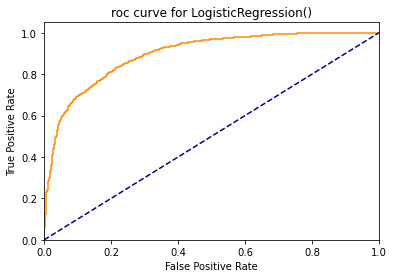


**************Area under the curve******************
0.8953409779062727


In [24]:
#score for logistic regression using only training data
train_score(lr)

### Tuning hyperparamaters  using Grid Search CV for Logistic Regresssion

In [25]:
#### Using GridSearchCV
param_grid_lr = {'C': [0.001, 0.01,0.1,1, 5, 10],
                 'solver':['lbfgs','saga'],
                'max_iter':[100,500,1000, 10000]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, verbose=1, n_jobs=-1)

In [26]:
grid_lr.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'max_iter': [100, 500, 1000, 10000],
                         'solver': ['lbfgs', 'saga']},
             verbose=1)

In [27]:
# best parameters for this dataset
print(grid_lr.best_params_)

{'C': 5, 'max_iter': 100, 'solver': 'lbfgs'}


In [28]:
# best score
print(grid_lr.best_score_)

0.8043294401933145


In [29]:
#best estimator
lr_b=grid_lr.best_estimator_
lr_b

LogisticRegression(C=5)

******************Train Score******************
0.8200559049615653

************Using K=3 cross validation**********
[0.79874214 0.80607966 0.79979036]

******Confusion Matrix using cross_val_predict****
[[1179  241]
 [ 327 1115]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1420
           1       0.82      0.77      0.80      1442

    accuracy                           0.80      2862
   macro avg       0.80      0.80      0.80      2862
weighted avg       0.80      0.80      0.80      2862


ROC Curve


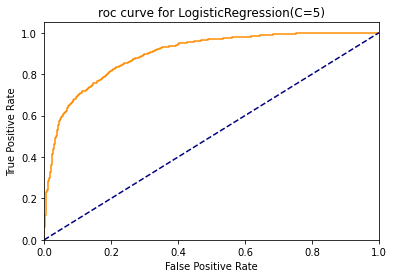


**************Area under the curve******************
0.896222480514153


In [30]:
#score for logistic regression using training data only after hyperparamater tuining
train_score(lr_b)

## Model 3: Support Vector Classifier

In [31]:
# Creating a support vector classifier model on the scaled data
svc= SVC(kernel='linear',  probability=True)

# Fit the model to the data
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

******************Train Score******************
0.8277428371767994

************Using K=3 cross validation**********
[0.80293501 0.82809224 0.81656184]

******Confusion Matrix using cross_val_predict****
[[1211  209]
 [ 318 1124]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1420
           1       0.84      0.78      0.81      1442

    accuracy                           0.82      2862
   macro avg       0.82      0.82      0.82      2862
weighted avg       0.82      0.82      0.82      2862


ROC Curve


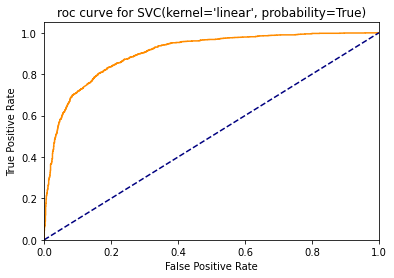


**************Area under the curve******************
0.9020071887636499


In [32]:
#score for support vector classifier using only training data
train_score(svc)

### Tuning hyperparamaters  using Randomized Search CV for SVC

In [33]:
#### Using GridSearchCV
param_rand_svc ={'C': [1.0,2.0],
                'kernel':['linear', 'poly','rbf'],
                'gamma':['auto','scale']}
rand_svc = RandomizedSearchCV(svc, param_rand_svc, cv=3, verbose=1, n_jobs=-1)

In [34]:
rand_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear', probability=True),
                   n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0],
                                        'gamma': ['auto', 'scale'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=1)

In [35]:
# best parameters for this dataset
print(rand_svc.best_params_)

{'kernel': 'linear', 'gamma': 'scale', 'C': 2.0}


In [36]:
# best score
print(rand_svc.best_score_)

0.8183088749126485


In [37]:
#best estimator
svc_b=rand_svc.best_estimator_
svc_b

SVC(C=2.0, kernel='linear', probability=True)

******************Train Score******************
0.8280922431865828

************Using K=3 cross validation**********
[0.80712788 0.83228512 0.81551363]

******Confusion Matrix using cross_val_predict****
[[1213  207]
 [ 313 1129]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1420
           1       0.85      0.78      0.81      1442

    accuracy                           0.82      2862
   macro avg       0.82      0.82      0.82      2862
weighted avg       0.82      0.82      0.82      2862


ROC Curve


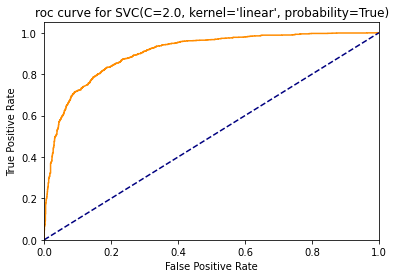


**************Area under the curve******************
0.9030200621202945


In [38]:
#score for support vector classifier using training data
train_score(svc_b)

## Model 4: Decision Tree Classifier

In [39]:
# Creating a Decision Tree model on the scaled data
dt= DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.80503145 0.79769392 0.76834382]

******Confusion Matrix using cross_val_predict****
[[1121  299]
 [ 282 1160]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1420
           1       0.80      0.80      0.80      1442

    accuracy                           0.80      2862
   macro avg       0.80      0.80      0.80      2862
weighted avg       0.80      0.80      0.80      2862


ROC Curve


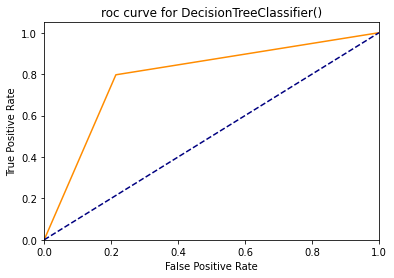


**************Area under the curve******************
0.7913627395440606


In [40]:
#score for Decision Tree using only training data
train_score(dt)

### Tuning hyperparamaters  using Grid Search CV for Decision Tree

In [41]:
#### Using GridSearchCV
param_grid_dt = {'criterion': ['gini','entropy'],
             'max_depth':[10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=3, verbose=1, n_jobs=-1)

In [42]:
grid_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 100, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 100, 1000, 10000]},
             verbose=1)

In [43]:
# best parameters for this dataset
print(grid_dt.best_params_)

{'criterion': 'entropy', 'max_depth': 10000, 'max_features': 'log2', 'min_samples_leaf': 100}


In [44]:
# best score
print(grid_dt.best_score_)

0.8232005590496158


In [45]:
#best estimator
dt_b=grid_dt.best_estimator_
dt_b

DecisionTreeClassifier(criterion='entropy', max_depth=10000,
                       max_features='log2', min_samples_leaf=100)

******************Train Score******************
0.6411600279524808

************Using K=3 cross validation**********
[0.8427673  0.66666667 0.59014675]

******Confusion Matrix using cross_val_predict****
[[ 634  786]
 [ 313 1129]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.67      0.45      0.54      1420
           1       0.59      0.78      0.67      1442

    accuracy                           0.62      2862
   macro avg       0.63      0.61      0.60      2862
weighted avg       0.63      0.62      0.60      2862


ROC Curve


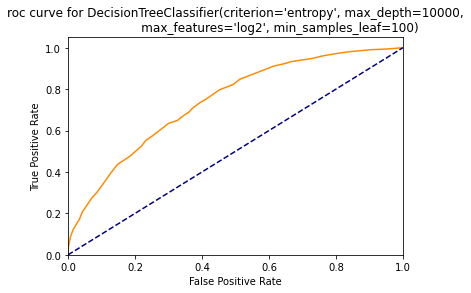


**************Area under the curve******************
0.7406858627493115


In [46]:
#score for decision tree using training data
train_score(dt_b)

## Model 5: Random Forest Classifier

In [47]:
# Creating a Random Forest Classifer model on the scaled data
rf= RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.83857442 0.85324948 0.83962264]

******Confusion Matrix using cross_val_predict****
[[1210  210]
 [ 219 1223]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1420
           1       0.85      0.85      0.85      1442

    accuracy                           0.85      2862
   macro avg       0.85      0.85      0.85      2862
weighted avg       0.85      0.85      0.85      2862


ROC Curve


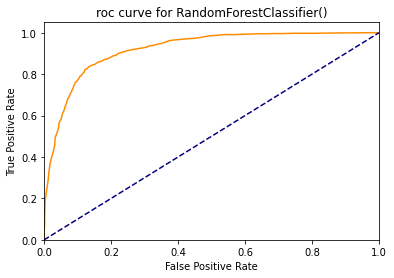


**************Area under the curve******************
0.9200789689593873


In [48]:
#score for Random Forest Classifer using only training data
train_score(rf)

[0.06191163 0.03026683 0.08992817 0.06254877 0.0996992  0.36915995
 0.00710018 0.00393702 0.00746458 0.00084442 0.00571508 0.0018216
 0.00870131 0.01209637 0.0304335  0.0055027  0.00613409 0.00588619
 0.00902051 0.00855173 0.00367372 0.00544869 0.00209528 0.00913372
 0.00489676 0.00406148 0.00131409 0.00223169 0.01140143 0.00644405
 0.01022522 0.00662058 0.00358199 0.00347997 0.00451683 0.00296672
 0.00402267 0.00664528 0.00353935 0.00332022 0.00348803 0.01213487
 0.0075791  0.00478454 0.00282401 0.0029551  0.00387776 0.00286537
 0.00851738 0.00060653 0.00787775 0.00825007 0.00789591]


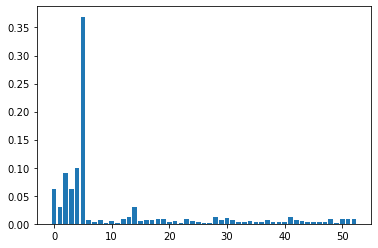

In [49]:
# plotting columns with its importances
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters  using Grid Search CV for Random Forest

In [50]:
#### Using GridSearchCV
param_grid_rf = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[1,2,5,10,100,1000,10000],
                'min_samples_leaf':[1,5,10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, verbose=1, n_jobs=-1)

In [51]:
grid_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 756 candidates, totalling 2268 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10, 100, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 100, 1000, 10000],
                         'n_estimators': [100, 200, 500]},
             verbose=1)

In [52]:
# best parameters for this dataset
print(grid_rf.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500}


In [53]:
# best score
print(grid_rf.best_score_)

0.8563941299790357


In [54]:
#best estimator
rf_b=grid_rf.best_estimator_
rf_b

RandomForestClassifier(max_depth=10, n_estimators=500)

******************Train Score******************
0.9157931516422082

************Using K=3 cross validation**********
[0.8490566  0.86373166 0.84381551]

******Confusion Matrix using cross_val_predict****
[[1221  199]
 [ 219 1223]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1420
           1       0.86      0.85      0.85      1442

    accuracy                           0.85      2862
   macro avg       0.85      0.85      0.85      2862
weighted avg       0.85      0.85      0.85      2862


ROC Curve


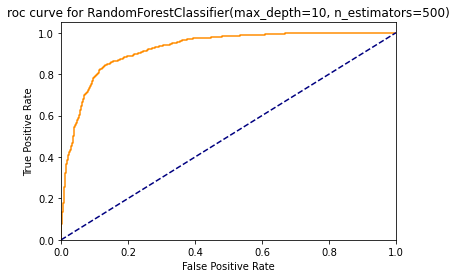


**************Area under the curve******************
0.9219604031958742


In [55]:
#score for random forest using training data
train_score(rf_b)

## Model 6: Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [56]:
# Creating a Extremely Random Trees model on the scaled data
rt= ExtraTreesClassifier()

# Fit the model to the data
rt.fit(X_train_scaled, y_train)

ExtraTreesClassifier()

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.80188679 0.79454927 0.79350105]

******Confusion Matrix using cross_val_predict****
[[1099  321]
 [ 257 1185]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1420
           1       0.79      0.82      0.80      1442

    accuracy                           0.80      2862
   macro avg       0.80      0.80      0.80      2862
weighted avg       0.80      0.80      0.80      2862


ROC Curve


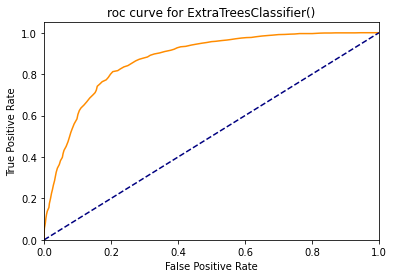


**************Area under the curve******************
0.8710879353792659


In [57]:
#score for Extremely Random Trees using only training data
train_score(rt)

[0.06087462 0.03742462 0.07095144 0.06912154 0.10366055 0.22548029
 0.01146984 0.00628064 0.00966234 0.00362471 0.00695576 0.00382234
 0.01180723 0.01362415 0.03100761 0.00800579 0.00718218 0.00959807
 0.01294603 0.01309139 0.0073563  0.0080476  0.00398148 0.01534627
 0.00835631 0.00768846 0.0029469  0.00422025 0.0179402  0.0124141
 0.01657652 0.01228714 0.00610474 0.00912977 0.00821227 0.00584046
 0.00710125 0.01065991 0.00459761 0.00436569 0.0049054  0.0165981
 0.0121124  0.00809962 0.00411657 0.00515159 0.00667354 0.00529485
 0.00914003 0.00069921 0.01186868 0.01293949 0.01263613]


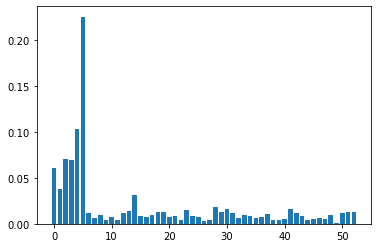

In [58]:
# plotting columns with its importances
features_rt = rt.feature_importances_
print(features_rt)
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters  using Randomized Search CV for Extremely Random Tree

In [59]:
#### Using GridSearchCV
param_rand_rt = {'n_estimators':[100,200,500],
              'criterion': ['gini','entropy'],
             'max_depth':[5,10,1000,10000],
                'min_samples_leaf':[10,100,1000,10000],
                'max_features':['auto','sqrt','log2']}
rand_rt = RandomizedSearchCV(rt, param_rand_rt, cv=5, verbose=1, n_jobs=-1)

In [60]:
rand_rt.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 1000, 10000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [10, 100, 1000,
                                                             10000],
                                        'n_estimators': [100, 200, 500]},
                   verbose=1)

In [61]:
# best parameters for this dataset
print(rand_rt.best_params_)

{'n_estimators': 200, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10000, 'criterion': 'gini'}


In [62]:
# best score
print(rand_rt.best_score_)

0.7693906442597541


In [63]:
#best estimator
rt_b=rand_rt.best_estimator_
rt_b

ExtraTreesClassifier(max_depth=10000, max_features='sqrt', min_samples_leaf=10,
                     n_estimators=200)

******************Train Score******************
0.8151642208245982

************Using K=3 cross validation**********
[0.74109015 0.76100629 0.76519916]

******Confusion Matrix using cross_val_predict****
[[ 995  425]
 [ 258 1184]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1420
           1       0.74      0.82      0.78      1442

    accuracy                           0.76      2862
   macro avg       0.76      0.76      0.76      2862
weighted avg       0.76      0.76      0.76      2862


ROC Curve


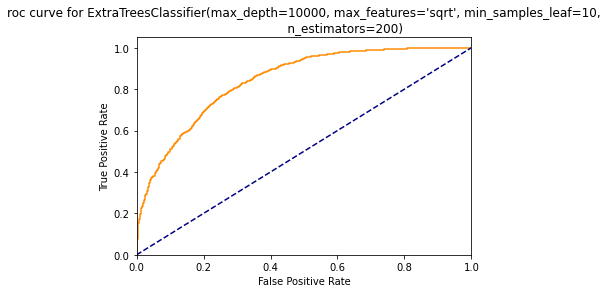


**************Area under the curve******************
0.8417382938407142


In [64]:
#score for extra tree classifier using training data
train_score(rt_b)

## Model 7: Boosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [65]:
# Creating a AdaBoostClassifier model on the scaled data
ab= AdaBoostClassifier(base_estimator = dt)

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.80293501 0.79559748 0.76624738]

******Confusion Matrix using cross_val_predict****
[[1118  302]
 [ 289 1153]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1420
           1       0.79      0.80      0.80      1442

    accuracy                           0.79      2862
   macro avg       0.79      0.79      0.79      2862
weighted avg       0.79      0.79      0.79      2862


ROC Curve


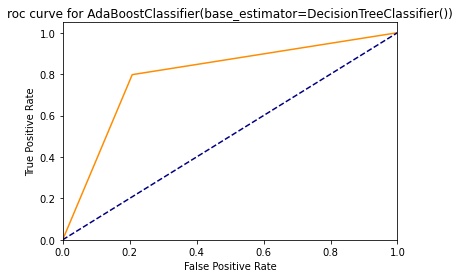


**************Area under the curve******************
0.7948784942665702


In [66]:
#score for adaboost using only training data
train_score(ab)

[4.78299198e-02 1.96439699e-02 6.39806400e-02 2.89484886e-02
 9.24062532e-02 5.10062863e-01 3.89310710e-03 2.15413150e-03
 6.09272892e-03 1.07418803e-03 6.87855549e-03 2.52135313e-04
 5.79398142e-03 1.22787102e-02 4.74861240e-02 0.00000000e+00
 7.57005244e-03 1.31685889e-03 3.54462576e-03 5.01704068e-03
 1.16279821e-03 9.70629603e-04 2.12837171e-03 2.40716142e-03
 1.00297565e-02 2.89047492e-03 1.16143039e-03 4.65262284e-03
 5.37011023e-03 7.83394561e-03 1.48399707e-02 7.11755863e-03
 1.83244698e-03 4.37413660e-03 1.67180065e-03 1.65385254e-03
 2.05786081e-03 6.90104431e-03 2.46393687e-03 4.44925653e-03
 3.65562441e-03 1.83696497e-03 6.54990585e-03 2.55580641e-03
 1.74713329e-03 4.40035561e-03 4.28187320e-03 4.51757289e-03
 8.79985917e-03 0.00000000e+00 1.04827997e-03 5.26196114e-03
 3.15112279e-03]


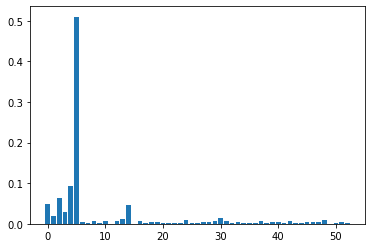

In [67]:
# plotting columns with its importances
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters  using Grid Search CV for AdaBoostClassifier

In [68]:
#### Using GridSearchCV
param_ab = {'n_estimators':[100,200,500, 1000, 2000, 5000],
             'learning_rate':[0.1]}
rand_ab = GridSearchCV(ab, param_ab, cv=3, verbose=1, n_jobs=-1)

In [69]:
rand_ab.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1],
                         'n_estimators': [100, 200, 500, 1000, 2000, 5000]},
             verbose=1)

In [70]:
# best parameters for this dataset
print(rand_ab.best_params_)

{'learning_rate': 0.1, 'n_estimators': 5000}


In [71]:
# best score
print(rand_ab.best_score_)

0.7973445143256465


In [72]:
#best estimator
ab_b=rand_ab.best_estimator_
ab_b

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=5000)

******************Train Score******************
1.0

************Using K=3 cross validation**********
[0.80293501 0.80712788 0.77253669]

******Confusion Matrix using cross_val_predict****
[[1125  295]
 [ 294 1148]]

***********Classification Report******************
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1420
           1       0.80      0.80      0.80      1442

    accuracy                           0.79      2862
   macro avg       0.79      0.79      0.79      2862
weighted avg       0.79      0.79      0.79      2862


ROC Curve


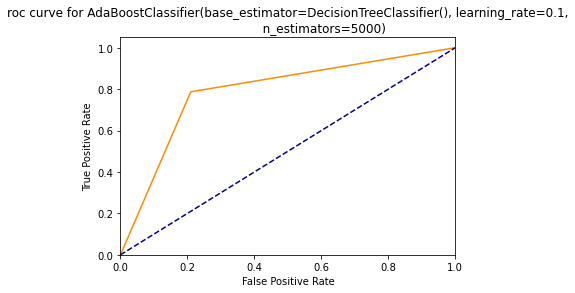


**************Area under the curve******************
0.7886210466683597


In [73]:
#score for adaboost classifier using training data
train_score(ab_b)

## Real and predicted value using different model

In [75]:
#Predected value
y_pred_sgd=sgd.predict(X_test_scaled)
y_pred_lr=lr.predict(X_test_scaled)
y_pred_svc=svc.predict(X_test_scaled)
y_pred_dt=dt.predict(X_test_scaled)
y_pred_rf=rf.predict(X_test_scaled)
y_pred_rt=rt.predict(X_test_scaled)
y_pred_ab=ab.predict(X_test_scaled)

In [76]:
df_pred=pd.DataFrame({'Real value':y_test,
                     'SGD Classifier':y_pred_sgd,
                     'Logistic Regression':y_pred_lr,
                     'SVC':y_pred_svc,
                     'Decision Tree':y_pred_dt,
                     'Random Forest':y_pred_rf,
                     'Extra Random Tree':y_pred_rt,
                     'AdaBoost':y_pred_ab})
df_pred.replace({1:'True', 0: 'False'}, inplace=True)
df_pred

,Real value,SGD Classifier,Logistic Regression,SVC,Decision Tree,Random Forest,Extra Random Tree,AdaBoost
0,False,False,False,False,False,False,False,False
1,True,False,True,True,True,True,True,True
2,True,False,True,False,True,True,False,True
3,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
949,False,False,False,False,True,False,False,True
950,True,True,True,True,False,True,True,True
951,True,True,True,True,True,True,True,True
952,False,True,True,True,True,False,True,True


SGD Classifier
********************Train Score******************
0.7973445143256463

*********************Test Score******************
0.79979035639413

**************Confusion Matrix******************
[[363 125]
 [ 66 400]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       488
           1       0.76      0.86      0.81       466

    accuracy                           0.80       954
   macro avg       0.80      0.80      0.80       954
weighted avg       0.81      0.80      0.80       954


ROC Curve


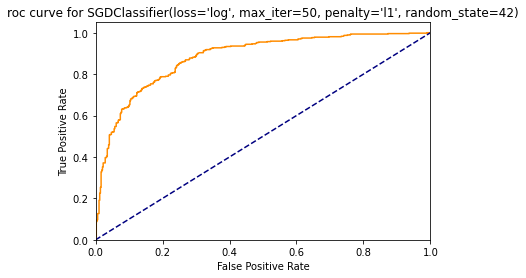


**************Area under the curve******************
0.8811739252796736
None
****************************************************************************************************
****************************************************************************************************

Logistic Regression
********************Train Score******************
0.8200559049615653

*********************Test Score******************
0.8228511530398323

**************Confusion Matrix******************
[[418  70]
 [ 99 367]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       488
           1       0.84      0.79      0.81       466

    accuracy                           0.82       954
   macro avg       0.82      0.82      0.82       954
weighted avg       0.82      0.82      0.82       954


ROC Curve


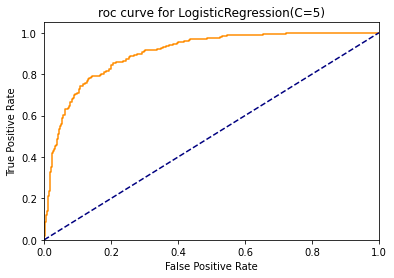


**************Area under the curve******************
0.90177126574263
None
****************************************************************************************************
****************************************************************************************************

SVC
********************Train Score******************
0.8280922431865828

*********************Test Score******************
0.8280922431865828

**************Confusion Matrix******************
[[421  67]
 [ 97 369]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       488
           1       0.85      0.79      0.82       466

    accuracy                           0.83       954
   macro avg       0.83      0.83      0.83       954
weighted avg       0.83      0.83      0.83       954


ROC Curve


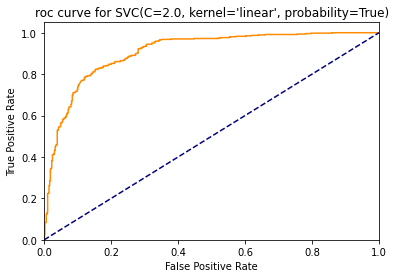


**************Area under the curve******************
0.9075494265812989
None
****************************************************************************************************
****************************************************************************************************

Decision Tree
********************Train Score******************
0.6411600279524808

*********************Test Score******************
0.6226415094339622

**************Confusion Matrix******************
[[228 260]
 [100 366]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.70      0.47      0.56       488
           1       0.58      0.79      0.67       466

    accuracy                           0.62       954
   macro avg       0.64      0.63      0.61       954
weighted avg       0.64      0.62      0.61       954


ROC Curve


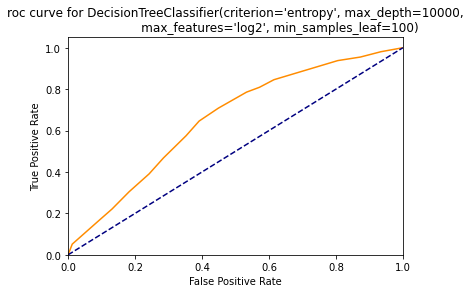


**************Area under the curve******************
0.6547394990501654
None
****************************************************************************************************
****************************************************************************************************

Random Forest
********************Train Score******************
0.9157931516422082

*********************Test Score******************
0.850104821802935

**************Confusion Matrix******************
[[415  73]
 [ 70 396]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       488
           1       0.84      0.85      0.85       466

    accuracy                           0.85       954
   macro avg       0.85      0.85      0.85       954
weighted avg       0.85      0.85      0.85       954


ROC Curve


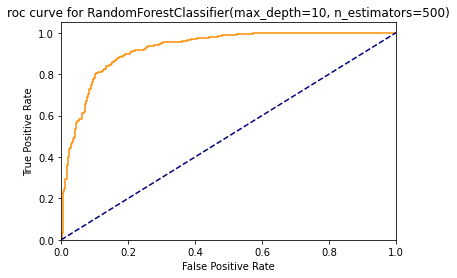


**************Area under the curve******************
0.9229578554844157
None
****************************************************************************************************
****************************************************************************************************

Extra Random Tree
********************Train Score******************
0.8151642208245982

*********************Test Score******************
0.7662473794549266

**************Confusion Matrix******************
[[344 144]
 [ 79 387]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.81      0.70      0.76       488
           1       0.73      0.83      0.78       466

    accuracy                           0.77       954
   macro avg       0.77      0.77      0.77       954
weighted avg       0.77      0.77      0.77       954


ROC Curve


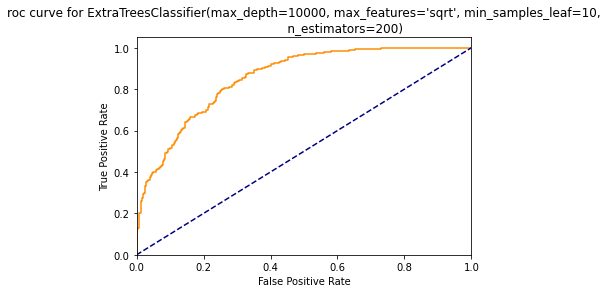


**************Area under the curve******************
0.8550798564694294
None
****************************************************************************************************
****************************************************************************************************

AdaBoost
********************Train Score******************
1.0

*********************Test Score******************
0.7976939203354297

**************Confusion Matrix******************
[[396  92]
 [101 365]]

**********Classification Report******************
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       488
           1       0.80      0.78      0.79       466

    accuracy                           0.80       954
   macro avg       0.80      0.80      0.80       954
weighted avg       0.80      0.80      0.80       954


ROC Curve


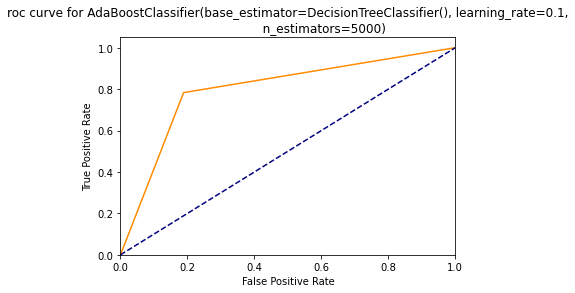


**************Area under the curve******************
0.7973686062055864
None
****************************************************************************************************
****************************************************************************************************



In [77]:
# score for different models using test data
print('SGD Classifier')
print(test_score(sgd_b))
print("*"*100)
print("*"*100)
print('')

print('Logistic Regression')
print(test_score(lr_b))
print("*"*100)
print("*"*100)
print('')

print('SVC')
print(test_score(svc_b))
print("*"*100)
print("*"*100)
print('')

print('Decision Tree')
print(test_score(dt_b))
print("*"*100)
print("*"*100)
print('')

print('Random Forest')
print(test_score(rf_b))
print("*"*100)
print("*"*100)
print('')

print('Extra Random Tree')
print(test_score(rt_b))
print("*"*100)
print("*"*100)
print('')

print('AdaBoost')
print(test_score(ab_b))
print("*"*100)
print("*"*100)
print('')

In [78]:
#defining function for model scoring with test set
def model_score(model, X_train_scaled=X_train_scaled, X_test_scaled=X_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    y_pred=model.predict(X_test_scaled)
    pre_score=precision_score(y_test, y_pred)
    re_score=recall_score(y_test, y_pred)
    f_score=f1_score(y_test, y_pred)
    
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score,pre_score, re_score,f_score, roc_auc ]
    return result

In [79]:
#making dataframe on evaluation metrices
all_evaluation=pd.DataFrame({'SGD':model_score(sgd_b),
                            'logistic Reg':model_score(lr_b),
                            'svc':model_score(svc_b),
                            'Decision Tree':model_score(dt_b),
                           'Random Forest':model_score(rf_b),
                            'Extra Random Tree':model_score(rt_b),
                           'Ada Boost':model_score(ab_b),}
                           ,index=['train score','test score', 
                                   'precision_score', 'recall_score', 'f1_score', 'auc'])
all_evaluation

,SGD,logistic Reg,svc,Decision Tree,Random Forest,Extra Random Tree,Ada Boost
train score,0.797345,0.820056,0.828092,0.641160,0.915793,0.815164,1.000000
test score,0.799790,0.822851,0.828092,0.622642,0.850105,0.766247,0.797694
precision_score,0.761905,0.839817,0.846330,0.584665,0.844350,0.728814,0.798687
recall_score,0.858369,0.787554,0.791845,0.785408,0.849785,0.830472,0.783262
f1_score,0.807265,0.812846,0.818182,0.670330,0.847059,0.776329,0.790899
auc,0.881174,0.901771,0.907549,0.654739,0.922958,0.855080,0.797369


In [94]:
all_evaluation.to_html('Resources/Cleaned_data/under_metrics.html')

## Trying to improve score by selecting important features based on Adaboost


In [80]:
#selecting and fitting model
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()))

In [81]:
sel.get_support()

array([ True, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [82]:
#splitting data using train_test split
X_train_sel, X_test_sel, y_train, y_test=train_test_split(sel.transform(X_dummies), y_label, random_state=1)

scaler1 = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler1.transform(X_train_sel)
X_selected_test_scaled = scaler1.transform(X_test_sel)


### SGD Classifier after selecting important features

In [83]:
#after model selection
sgd_s = SGDClassifier(random_state=42, loss='log').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {sgd_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {sgd_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8043326345213138
Testing Score: 0.8291404612159329


### Logistic Regression after selecting important features

In [84]:
#after model selection
lr_s = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.803633822501747
Testing Score: 0.8238993710691824


### SVC after selecting important features

In [90]:
#after model selection
# Support vector machine linear classifier
svc_s=SVC(kernel='linear', probability=True).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8004891684136967
Testing Score: 0.7976939203354297


### Decision Tree after selecting important features

In [86]:
#after model selection
dt_s = DecisionTreeClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9989517819706499
Testing Score: 0.7819706498951782


### Random Forest after selecting important features

In [87]:
#after model selection
rf_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9989517819706499
Testing Score: 0.8553459119496856


### Extra Random Tree after selecting important features

In [92]:
#after model selection
rt_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
rt_s_train=rt_s.score(X_selected_train_scaled, y_train)
rt_s_test=rt_s.score(X_selected_test_scaled, y_test)
print(f'Training Score: {rt_s_train}')
print(f'Testing Score: {rt_s_test}')

Training Score: 0.9989517819706499
Testing Score: 0.8511530398322851


In [88]:
#defining function for model scoring with test set
def model_imp_feat(model, X_train_scaled=X_selected_train_scaled, X_test_scaled=X_selected_test_scaled, 
               y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    y_pred=model.predict(X_test_scaled)
    pre_score=precision_score(y_test, y_pred)
    re_score=recall_score(y_test, y_pred)
    f_score=f1_score(y_test, y_pred)
    
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    roc_auc = auc(fpr, tpr)
    result=[train_score, test_score,pre_score, re_score,f_score, roc_auc ]
    return result

In [95]:
#making dataframe on evaluation metrices
all_evaluation_imp_feat=pd.DataFrame({'SGD':model_imp_feat(sgd_s),
                            'logistic Reg':model_imp_feat(lr_s),
                            'svc':model_imp_feat(svc_s),
                            'Decision Tree':model_imp_feat(dt_s),
                           'Random Forest':model_imp_feat(rf_s),
                            'Extra Random Tree':model_imp_feat(rt_s)}
                           ,index=['train score','test score', 
                                   'precision_score', 'recall_score', 'f1_score', 'auc'])
all_evaluation_imp_feat

,SGD,logistic Reg,svc,Decision Tree,Random Forest,Extra Random Tree
train score,0.804333,0.803634,0.800489,0.998952,0.998952,0.998952
test score,0.829140,0.823899,0.797694,0.781971,0.855346,0.851153
precision_score,0.817987,0.820175,0.765408,0.763598,0.829918,0.825820
recall_score,0.830435,0.813043,0.836957,0.793478,0.880435,0.876087
f1_score,0.824164,0.816594,0.799585,0.778252,0.854430,0.850211
auc,0.899437,0.901452,0.900968,0.776305,0.920967,0.919488


In [96]:
all_evaluation_imp_feat.to_html('Resources/Cleaned_data/under_metrics_imp.html')